In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
import pandas as pd
import pickle
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


In [2]:
Dados = pd.read_csv(r'G:\Outros computadores\Meu modelo Computador\IFES\9 Período\Controle Inteligente\Trabalho 3\sem_pertu\teste5.csv', on_bad_lines='skip', header=None)
# Dados.values
# Dados.head(5)
# print(Dados)

Entradas = Dados.iloc[:,:-1]
Entradas.shape
Saidas = Dados.iloc[:,4]

In [3]:
Entradas

,0,1,2,3
0,-0.164985,-4.285309,-0.005717,6.335611
1,-0.207838,-0.045053,0.057639,-0.025509
2,-0.208288,0.552431,0.057384,-0.911779
3,-0.202764,0.075944,0.048266,-0.189794
4,-0.202005,-0.043102,0.046368,-0.004341
...,...,...,...,...
49628,-0.000470,0.000573,-0.000078,0.000092
49629,-0.000464,0.000566,-0.000077,0.000091
49630,-0.000458,0.000560,-0.000076,0.000090
49631,-0.000453,0.000553,-0.000075,0.000089


In [4]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(Entradas,Saidas,test_size=0.2)

In [5]:
Rede=MLPRegressor(hidden_layer_sizes=[4,2],
                  activation='relu',
                  verbose=True,
                  max_iter=10000,
                  solver="adam")
Rede.fit(Entradas,Saidas)

Iteration 1, loss = 420.62773990
Iteration 2, loss = 419.74972273
Iteration 3, loss = 418.91514061
Iteration 4, loss = 417.91584451
Iteration 5, loss = 416.63245583
Iteration 6, loss = 414.97793793
Iteration 7, loss = 413.00938622
Iteration 8, loss = 410.78994702
Iteration 9, loss = 408.16252774
Iteration 10, loss = 405.26387451
Iteration 11, loss = 402.14518155
Iteration 12, loss = 398.56511820
Iteration 13, loss = 394.73048943
Iteration 14, loss = 390.67071831
Iteration 15, loss = 386.57282119
Iteration 16, loss = 382.15164196
Iteration 17, loss = 377.22279518
Iteration 18, loss = 372.39002507
Iteration 19, loss = 367.24506512
Iteration 20, loss = 362.06900043
Iteration 21, loss = 356.81461970
Iteration 22, loss = 351.24455996
Iteration 23, loss = 345.94835020
Iteration 24, loss = 340.23823829
Iteration 25, loss = 334.78788131
Iteration 26, loss = 329.20438168
Iteration 27, loss = 323.83888678
Iteration 28, loss = 318.22920123
Iteration 29, loss = 312.84400326
Iteration 30, loss = 30

MLPRegressor(hidden_layer_sizes=[4, 2], max_iter=10000, verbose=True)

In [6]:
r2train=Rede.score(Xtrain, Ytrain)
print("R2 Score do treinamento: ", r2train)
r2test=Rede.score(Xtest, Ytest)
print("R2 Score do teste: ", r2test)

R2 Score do treinamento:  0.47047731658472636
R2 Score do teste:  0.6753990308949154


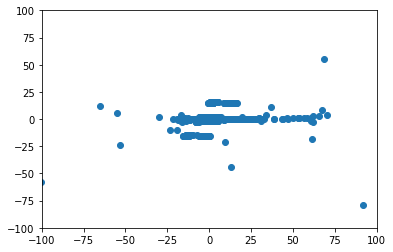

In [51]:
Ypred=Rede.predict(Xtest)
plt.scatter(Ypred,Ytest)
plt.xlim([-100,100])
plt.ylim([-100,100])
#plt.scatter(Xtest,Ypred)
plt.show()

In [48]:
filename = 'finalized_model_sem_espaco.sav'
pickle.dump(Rede, open(filename, 'wb'))
 
# some time later...
 


In [50]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xtest, Ytest)
print(result)

0.6465708993511641
